In [1]:
import pandas as pd
from pandas.io import sql
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [2]:
credit = pd.read_csv("/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/Interview-prep/Code-challenges/Week 11 Code Challenge/data/credit_info.csv", encoding = 'utf-8')
customer = pd.read_csv("/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/Interview-prep/Code-challenges/Week 11 Code Challenge/data/customer_info.csv", encoding = 'utf-8')

In [39]:

credit.columns=[u'Unnamed: 0', u'ID', u'PAY_STAT_SEP', u'PAY_STAT_AUG', u'PAY_STAT_JUL',
       u'PAY_STAT_JUN', u'PAY_STAT_MAY', u'PAY_STAT_APR', u'BILL_AMT_SEP',
       u'BILL_AMT_AUG', u'BILL_AMT_JUL', u'BILL_AMT_JUN', u'BILL_AMT_MAY',
       u'BILL_AMT_APR', u'BILL_PAY_SEP', u'BILL_PAY_AUG', u'BILL_PAY_JUL',
       u'BILL_PAY_JUN', u'BILL_PAY_MAY', u'BILL_PAY_APR',
       u'default_payment_next_month']
credit.head()

,Unnamed: 0,ID,PAY_STAT_SEP,PAY_STAT_AUG,PAY_STAT_JUL,PAY_STAT_JUN,PAY_STAT_MAY,PAY_STAT_APR,BILL_AMT_SEP,BILL_AMT_AUG,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,BILL_PAY_SEP,BILL_PAY_AUG,BILL_PAY_JUL,BILL_PAY_JUN,BILL_PAY_MAY,BILL_PAY_APR,default_payment_next_month
0,0,1,2,2,-1,-1,-2,-2,3913,3102.0,...,0,0,0,0,689,0,0,0,0,1
1,1,2,-1,2,0,0,0,2,2682,1725.0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,0,0,0,0,0,0,29239,14027.0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,0,0,0,0,0,0,46990,48233.0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,-1,0,-1,0,0,0,8617,5670.0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:

customer.columns=[u'Unnamed: 0', u'ID', u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE',
       u'AGE', u'default_payment_next_month']
customer.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default_payment_next_month
0,0,1,20000,2,2.0,1,24,1
1,1,2,120000,2,2.0,2,26,1
2,2,3,90000,2,2.0,2,34,0
3,3,4,50000,2,2.0,1,37,0
4,4,5,50000,1,2.0,1,57,0


In [43]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
Unnamed: 0                    30000 non-null int64
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     26964 non-null float64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
default_payment_next_month    30000 non-null int64
dtypes: float64(1), int64(7)
memory usage: 1.8 MB


In [44]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
Unnamed: 0                    30000 non-null int64
ID                            30000 non-null int64
PAY_STAT_SEP                  30000 non-null int64
PAY_STAT_AUG                  30000 non-null int64
PAY_STAT_JUL                  30000 non-null int64
PAY_STAT_JUN                  30000 non-null int64
PAY_STAT_MAY                  30000 non-null int64
PAY_STAT_APR                  30000 non-null int64
BILL_AMT_SEP                  30000 non-null int64
BILL_AMT_AUG                  27457 non-null float64
BILL_AMT_JUL                  30000 non-null int64
BILL_AMT_JUN                  30000 non-null int64
BILL_AMT_MAY                  30000 non-null int64
BILL_AMT_APR                  30000 non-null int64
BILL_PAY_SEP                  30000 non-null int64
BILL_PAY_AUG                  30000 non-null int64
BILL_PAY_JUL                  30000 non-null int64
BILL_PAY_JUN          

In [45]:
# Import Sqlite3 Library
import sqlite3

# Establishing the Connection to our Database.  If no database exists here, this will create one.
connection = sqlite3.connect('data/code_challenge.db.sqlite')

# Keep in mind the directory your notebook is open in is the base directory for all of our SQL actions from here.

In [47]:
## create different dataframes
df_1= credit.drop([u'Unnamed: 0', u'BILL_AMT_SEP',
       u'BILL_AMT_AUG', u'BILL_AMT_JUL', u'BILL_AMT_JUN', u'BILL_AMT_MAY',
       u'BILL_AMT_APR', u'BILL_PAY_SEP', u'BILL_PAY_AUG', u'BILL_PAY_JUL',
       u'BILL_PAY_JUN', u'BILL_PAY_MAY', u'BILL_PAY_APR'], axis=1)
df_2= credit.drop([u'Unnamed: 0', u'PAY_STAT_SEP', u'PAY_STAT_AUG', u'PAY_STAT_JUL',
       u'PAY_STAT_JUN', u'PAY_STAT_MAY', u'PAY_STAT_APR', u'BILL_PAY_SEP', u'BILL_PAY_AUG', u'BILL_PAY_JUL',
       u'BILL_PAY_JUN', u'BILL_PAY_MAY', u'BILL_PAY_APR'], axis=1)
df_3= credit.drop([u'Unnamed: 0',  u'PAY_STAT_SEP', u'PAY_STAT_AUG', u'PAY_STAT_JUL',
       u'PAY_STAT_JUN', u'PAY_STAT_MAY', u'PAY_STAT_APR', u'BILL_AMT_SEP',
       u'BILL_AMT_AUG', u'BILL_AMT_JUL', u'BILL_AMT_JUN', u'BILL_AMT_MAY',
       u'BILL_AMT_APR'], axis=1)

In [48]:
df_1.head()

,ID,PAY_STAT_SEP,PAY_STAT_AUG,PAY_STAT_JUL,PAY_STAT_JUN,PAY_STAT_MAY,PAY_STAT_APR,default_payment_next_month
0,1,2,2,-1,-1,-2,-2,1
1,2,-1,2,0,0,0,2,1
2,3,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0
4,5,-1,0,-1,0,0,0,0


In [49]:
df_2.head()

,ID,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,default_payment_next_month
0,1,3913,3102.0,689,0,0,0,1
1,2,2682,1725.0,2682,3272,3455,3261,1
2,3,29239,14027.0,13559,14331,14948,15549,0
3,4,46990,48233.0,49291,28314,28959,29547,0
4,5,8617,5670.0,35835,20940,19146,19131,0


In [50]:
df_3.head()


,ID,BILL_PAY_SEP,BILL_PAY_AUG,BILL_PAY_JUL,BILL_PAY_JUN,BILL_PAY_MAY,BILL_PAY_APR,default_payment_next_month
0,1,0,689,0,0,0,0,1
1,2,0,1000,1000,1000,0,2000,1
2,3,1518,1500,1000,1000,1000,5000,0
3,4,2000,2019,1200,1100,1069,1000,0
4,5,2000,36681,10000,9000,689,679,0


In [51]:
# Converts a DataFrame into a SQL database
df_1.to_sql(name = 'credit_stat', con = connection, if_exists = 'replace', index = False)
df_2.to_sql(name = 'credit_AMT', con = connection, if_exists = 'replace', index = False)
df_3.to_sql(name = 'credit_PAY', con = connection, if_exists = 'replace', index = False)

# name = name of the database useful if you have multiple tables in a SQL database
# con = the connection path to where the data should be placed
# if_exists = condition to pass if the database already exists.

In [52]:
#customer.columns = [u'Unnamed: 0',u'ID',u'LIMIT_BAL',u'SEX',u'EDUCATION',u'MARRIAGE',u'AGE',u'default payment next month']

customer.columns

Index([u'Unnamed: 0', u'ID', u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE',
       u'AGE', u'default_payment_next_month'],
      dtype='object')

In [53]:
df_4= customer.drop([u'Unnamed: 0'], axis=1)

In [54]:
df_4.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default_payment_next_month
0,1,20000,2,2.0,1,24,1
1,2,120000,2,2.0,2,26,1
2,3,90000,2,2.0,2,34,0
3,4,50000,2,2.0,1,37,0
4,5,50000,1,2.0,1,57,0


In [55]:
df_4.to_sql(name = 'customer_info', con = connection, if_exists = 'replace', index = False)


# Tuesday

In [56]:

limit_bal = sql.read_sql('SELECT LIMIT_BAL FROM customer_info', con = connection)
sex = sql.read_sql('SELECT SEX FROM customer_info', con = connection)
edu = sql.read_sql('SELECT EDUCATION FROM customer_info', con = connection)
marriage = sql.read_sql('SELECT MARRIAGE FROM customer_info', con = connection)
age = sql.read_sql('SELECT AGE FROM customer_info', con = connection)
# counting unique values in the list


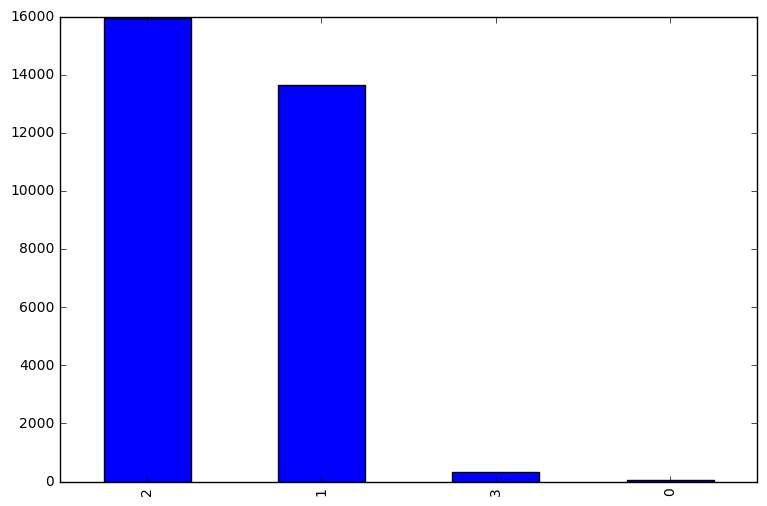

In [57]:
marriage['MARRIAGE'].value_counts().plot(kind='bar')

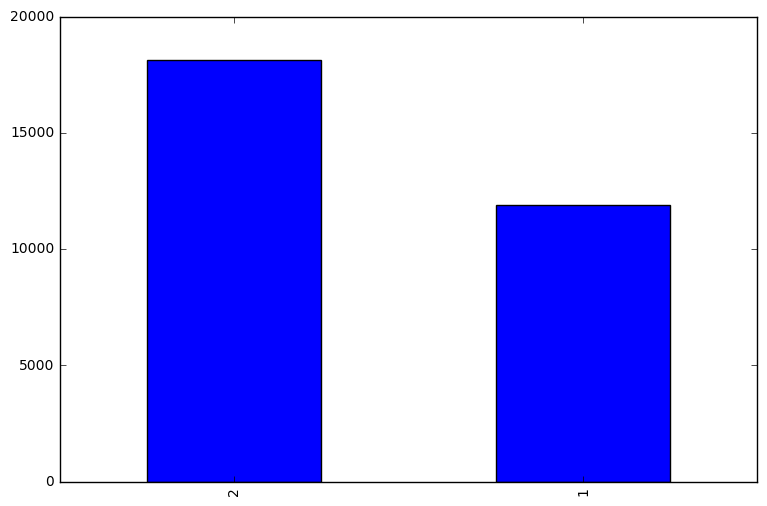

In [58]:
sex['SEX'].value_counts().plot(kind='bar')

In [60]:
age['AGE'].mean()

35.4855

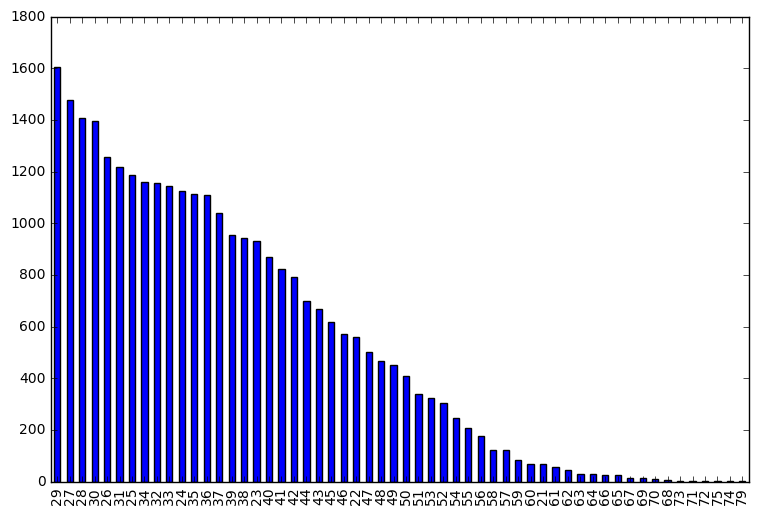

In [59]:

age['AGE'].value_counts().plot(kind='bar')

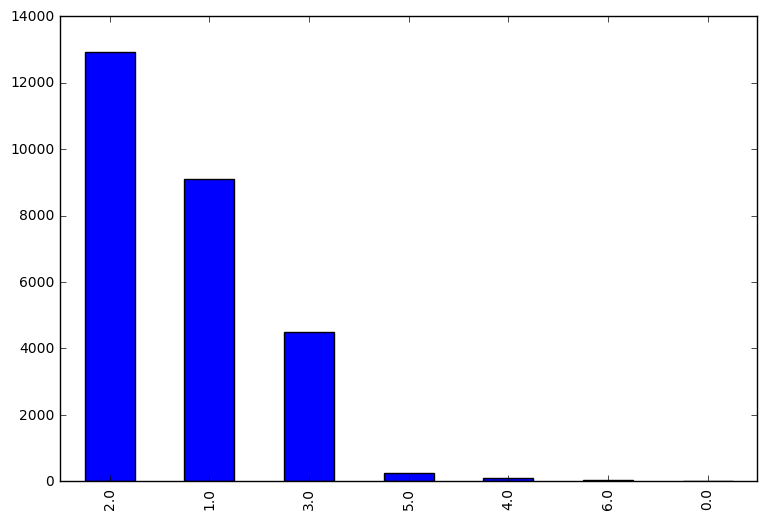

In [61]:
edu['EDUCATION'].value_counts().plot(kind='bar')

In [65]:
print limit_bal['LIMIT_BAL'].max()
print limit_bal['LIMIT_BAL'].mean()
print limit_bal['LIMIT_BAL'].min()


1000000
167484.322667
10000


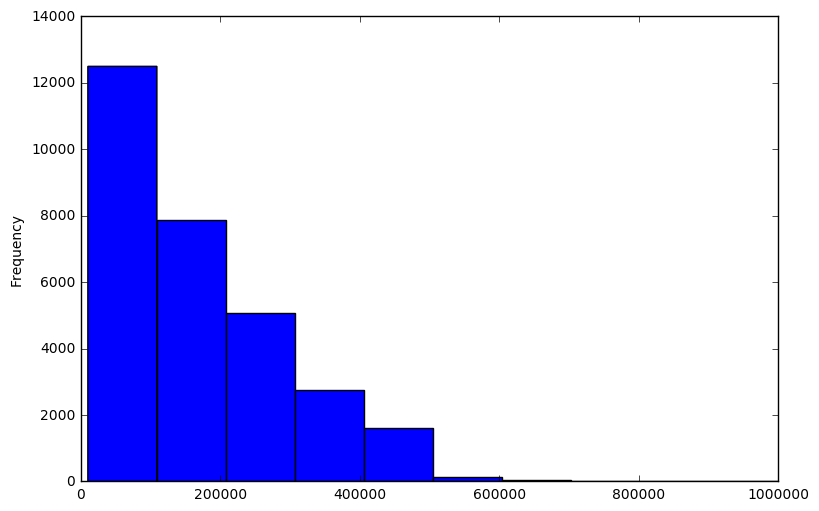

In [66]:
limit_bal['LIMIT_BAL'].plot(kind='hist')

In [25]:

table1 = sql.read_sql('SELECT * FROM credit_stat', con = connection)
table2 = sql.read_sql('SELECT * FROM credit_AMT', con = connection)
table3 = sql.read_sql('SELECT * FROM credit_PAY', con = connection)

In [67]:
table1.head()

,ID,PAY_STAT_SEP,PAY_STAT_AUG,PAY_STAT_JUL,PAY_STAT_JUN,PAY_STAT_MAY,PAY_STAT_APR,default payment next month
0,1,2,2,-1,-1,-2,-2,1
1,2,-1,2,0,0,0,2,1
2,3,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0
4,5,-1,0,-1,0,0,0,0


In [68]:
table2.head()

,ID,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,default payment next month
0,1,3913,3102.0,689,0,0,0,1
1,2,2682,1725.0,2682,3272,3455,3261,1
2,3,29239,14027.0,13559,14331,14948,15549,0
3,4,46990,48233.0,49291,28314,28959,29547,0
4,5,8617,5670.0,35835,20940,19146,19131,0


In [26]:
table3.head()

,ID,BILL_PAY_SEP,BILL_PAY_AUG,BILL_PAY_JUL,BILL_PAY_JUN,BILL_PAY_MAY,BILL_PAY_APR,default payment next month
0,1,0,689,0,0,0,0,1
1,2,0,1000,1000,1000,0,2000,1
2,3,1518,1500,1000,1000,1000,5000,0
3,4,2000,2019,1200,1100,1069,1000,0
4,5,2000,36681,10000,9000,689,679,0


In [70]:
print table1['PAY_STAT_APR'].value_counts()
print table1['PAY_STAT_MAY'].value_counts()
print table1['PAY_STAT_JUN'].value_counts()
print table1['PAY_STAT_JUL'].value_counts()
print table1['PAY_STAT_AUG'].value_counts()
print table1['PAY_STAT_SEP'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_STAT_APR, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_STAT_MAY, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_STAT_JUN, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_STAT_JUL, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_STAT_AUG, dtype: int64
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_STAT_SEP, dtype: int64


In [71]:
print table2['BILL_AMT_APR'].value_counts()
print table2['BILL_AMT_MAY'].value_counts()
print table2['BILL_AMT_JUN'].value_counts()
print table2['BILL_AMT_JUL'].value_counts()
print table2['BILL_AMT_AUG'].value_counts()
print table2['BILL_AMT_SEP'].value_counts()

 0         4020
 390        207
 780         86
 150         78
 316         77
 326         56
 396         45
 416         36
-18          33
 2400        32
 1000        31
 2500        30
 500         29
 540         29
 10000       27
 300         26
-1           25
 930         24
 1050        23
-2           23
 291         22
-200         20
 1650        18
 20000       18
 1320        17
 1261        17
 264         17
 600         17
 380         17
-3           16
           ... 
 50570        1
 48233        1
 10799        1
 21040        1
 23089        1
 318274       1
 31285        1
 188982       1
 27191        1
 4664         1
 6713         1
 25126        1
 61988        1
 117283       1
 5470         1
-518          1
 4616         1
 72201        1
 2571         1
 8453         1
 19492        1
 4877         1
 77440        1
 59927        1
 70168        1
 6681         1
 2587         1
 52327        1
 47645        1
 10253        1
Name: BILL_AMT_APR, dtyp

In [72]:
print table3['BILL_PAY_APR'].value_counts()
print table3['BILL_PAY_MAY'].value_counts()
print table3['BILL_PAY_JUN'].value_counts()
print table3['BILL_PAY_JUL'].value_counts()
print table3['BILL_PAY_AUG'].value_counts()
print table3['BILL_PAY_SEP'].value_counts()

0         7173
1000      1299
2000      1295
3000       914
5000       808
1500       439
4000       411
10000      356
500        247
6000       220
2500       214
390        177
3500       159
7000       149
1200       148
8000       115
600        112
1100       109
4500       101
1600        99
700         98
800         96
780         91
2200        80
1700        80
1300        80
15000       77
20000       76
1800        73
1400        73
          ... 
8346         1
403500       1
2409         1
4458         1
8556         1
24948        1
2191         1
6523         1
12670        1
6285         1
96583        1
2361         1
16608        1
4252         1
20706        1
4268         1
6379         1
248          1
2297         1
4346         1
6395         1
24738        1
2207         1
528666       1
28966        1
6301         1
6443         1
20786        1
31031        1
3239         1
Name: BILL_PAY_APR, dtype: int64
0         6703
1000      1340
2000      1323
3000   

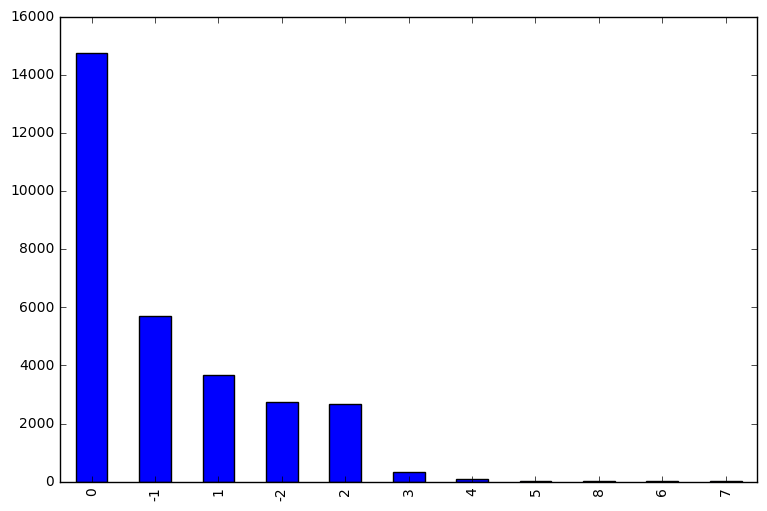

In [28]:
table1['PAY_STAT_SEP'].value_counts().plot(kind='bar')

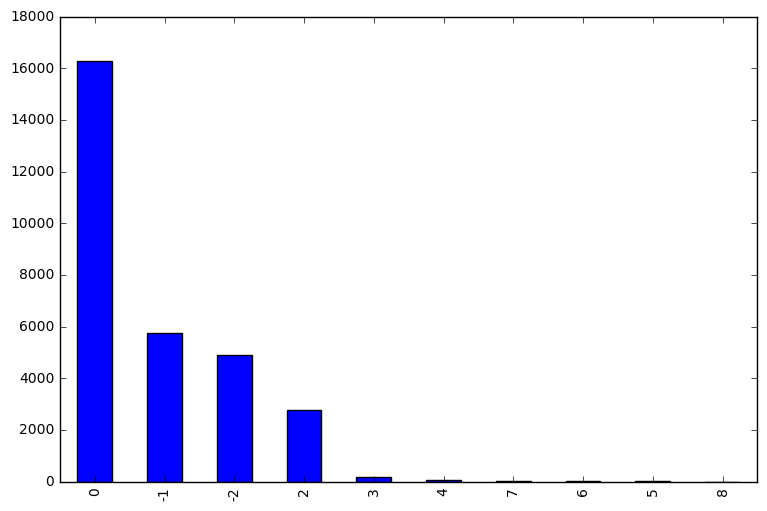

In [34]:
table1['PAY_STAT_APR'].value_counts().plot('bar')

# WEDNESDAY

In [75]:
# Extracting information again, join using the newly created table and the sales target tables
df_data= sql.read_sql('SELECT table1."ID", table1."PAY_STAT_APR"'
                      'FROM table1 '
                      'INNER JOIN cutomer_info '
                      'ON table1."ID"=cutomer_info."ID"' ,
                      con = connection)
# This is a double join in that it is match values in two columns


DatabaseError: Execution failed on sql 'SELECT table1."ID", table1."PAY_STAT_APR"FROM table1 INNER JOIN cutomer_info ON table1."ID"=cutomer_info."ID"': no such table: table1

In [73]:
# Extracting information again, join using the newly created table and the sales target tables
df_data= sql.read_sql('SELECT customer_info."ID",customer_info."LIMIT_BAL",customer_info."SEX",customer_info."EDUCATION",customer_info."MARRIAGE",customer_info."AGE",'
                      'FROM customer_info '
                      'INNER JOIN table1 '
                      'ON sales_targets."month_of_order_date" = sales_by_month."mnth_yr" AND '
                      'sales_targets."category" = sales_by_month."category"',
                      con = db_connection)
# This is a double join in that it is match values in two columns

#


NameError: name 'db_connection' is not defined